# Import Library

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [10]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

In [11]:
df[df['NumberOfAddress'] == 22]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3506,53507,0,13.0,Computer,1,16.0,Debit Card,Male,4.0,4,Laptop & Accessory,4,Single,22,0,16.0,2.0,2.0,4.0,192.82


In [12]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


# Things to do:

- split training and unseen data (test data)
- Drop duplicated data
- Drop customerID
- PreferredLoginDevice: merubah category "Mobile Phone" menjadi "Phone"
- PreferredPaymentMode: merubah category CC menjadi Credit Card dan COD menjadi Cash on Delivery
- Handle missing value
- Feature selection: Tenure, CityTier, WarehouseToHome, Complain, DaySinceLastOrder, CashbackAmount
- Prevent multicolinearity
- Log transform: Tenure, WarehouseToHome, NumberOfAddress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder
- Square Transformation: CashbackAmount
- data sudah dilihat pada EDA bahwa tidak ada outlier ( data masuk akal dan terlihat nyata )

In [13]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Handle duplicated data

In [14]:
df.duplicated().any()

False

# Drop unused columns and target column

In [15]:
df.drop('CustomerID', axis = 1, inplace = True)

In [16]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

# Splitting Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Change misscategorize value

In [18]:
X_train['PreferredLoginDevice'].replace('Mobile Phone', 'Phone', inplace = True)
X_train['PreferredPaymentMode'].replace({'CC':'Credit Card', 'COD':'Cash on Delivery'}, inplace = True)

X_test['PreferredLoginDevice'].replace('Mobile Phone', 'Phone', inplace = True)
X_test['PreferredPaymentMode'].replace({'CC':'Credit Card', 'COD':'Cash on Delivery'}, inplace = True)

In [19]:
cat = []
num = []

for col in X_train.columns:
    if df[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

# Handle Missing Value

In [20]:
for col in cat:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])

for col in num:
    X_train[col] = X_train[col].fillna(X_train[col].median())

In [21]:
for col in cat:
    X_test[col] = X_test[col].fillna(X_test[col].mode()[0])

for col in num:
    X_test[col] = X_test[col].fillna(X_test[col].median())

In [22]:
X_train.isna().sum()

Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [23]:
X_test.isna().sum()

Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [24]:
feature = ['Tenure', 'CityTier', 'WarehouseToHome', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']

In [25]:
X_train = X_train[feature]
X_test = X_test[feature]

In [26]:
cat = []
num = []

for col in X_train.columns:
    if df[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

In [27]:
num

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount']

In [28]:
cat

[]

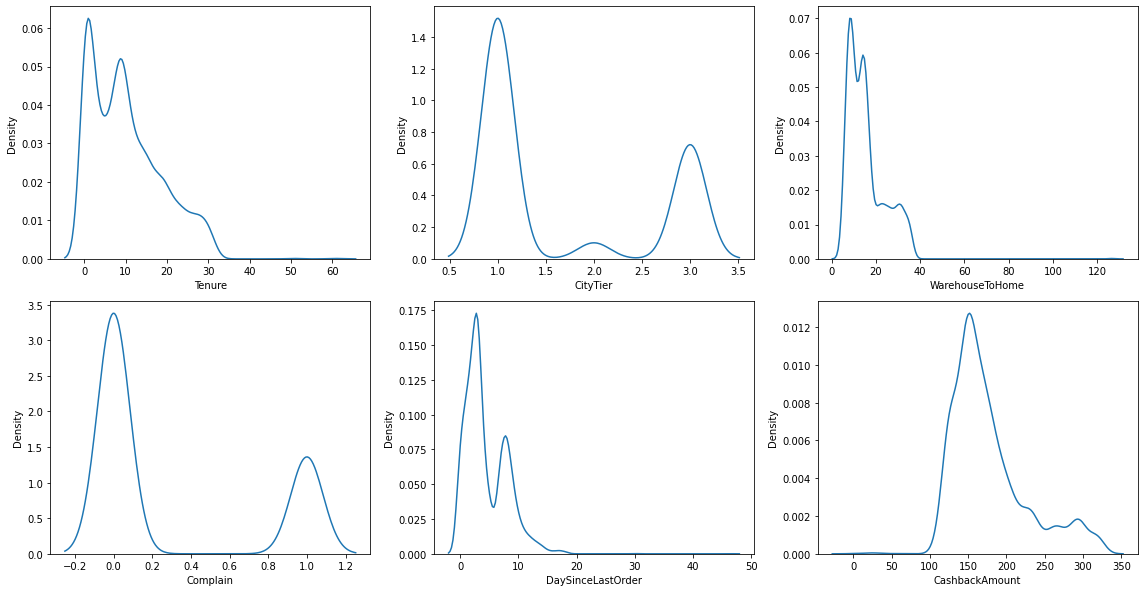

In [29]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train[num[i]])
    plt.tight_layout()

In [34]:
X_train.columns

Index(['Tenure', 'CityTier', 'WarehouseToHome', 'Complain',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

# Feature Transformation

disini kita akan menggunakan boxcox, log, square root, dan cube root untuk mentransformasi kolom yang mempunyai distribusi right skewed sehingga mendekati distribusi normal

In [60]:
log_col = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']

In [95]:
X_train_transform = X_train.copy()
X_test_transform = X_test.copy()

In [96]:
X_train_transform.describe()

,Tenure,CityTier,WarehouseToHome,Complain,DaySinceLastOrder,CashbackAmount
count,4504.000000,4504.000000,4504.000000,4504.000000,4504.000000,4504.000000
mean,10.146314,1.659192,15.610568,0.287078,4.434281,177.146754
std,8.413616,0.916920,8.434684,0.452449,3.551047,49.124316
min,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,145.700000
50%,9.000000,1.000000,14.000000,0.000000,3.000000,163.670000
75%,15.000000,3.000000,20.000000,1.000000,7.000000,195.820000
max,61.000000,3.000000,127.000000,1.000000,46.000000,324.990000


In [97]:
X_train_transform

,Tenure,CityTier,WarehouseToHome,Complain,DaySinceLastOrder,CashbackAmount
4478,1.0,1,12.0,1,3.0,149.78
3685,17.0,1,13.0,1,9.0,165.81
731,0.0,1,9.0,0,2.0,130.33
291,9.0,1,8.0,1,0.0,117.02
184,4.0,1,11.0,1,3.0,148.21
...,...,...,...,...,...,...
3772,1.0,1,27.0,0,3.0,147.72
5191,10.0,3,16.0,0,3.0,225.96
5226,7.0,1,11.0,0,3.0,163.38
5390,1.0,1,36.0,0,3.0,164.07


In [98]:
X_train_transform[log_col].describe()

,Tenure,WarehouseToHome,DaySinceLastOrder
count,4504.000000,4504.000000,4504.000000
mean,10.146314,15.610568,4.434281
std,8.413616,8.434684,3.551047
min,0.000000,5.000000,0.000000
25%,3.000000,9.000000,2.000000
50%,9.000000,14.000000,3.000000
75%,15.000000,20.000000,7.000000
max,61.000000,127.000000,46.000000


In [99]:
 X_train_transform.loc[X_train_transform['Tenure'] != 0]['Tenure'].min()/2

0.5

In [100]:
for col in log_col:
    X_train_transform.loc[X_train_transform[col] == 0, col] =  X_train_transform.loc[X_train_transform[col] != 0][col].min()/2

In [101]:
X_train_transform.describe()

,Tenure,CityTier,WarehouseToHome,Complain,DaySinceLastOrder,CashbackAmount
count,4504.000000,4504.000000,4504.000000,4504.000000,4504.000000,4504.000000
mean,10.191385,1.659192,15.610568,0.287078,4.479019,177.146754
std,8.360301,0.916920,8.434684,0.452449,3.497636,49.124316
min,0.500000,1.000000,5.000000,0.000000,0.500000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,145.700000
50%,9.000000,1.000000,14.000000,0.000000,3.000000,163.670000
75%,15.000000,3.000000,20.000000,1.000000,7.000000,195.820000
max,61.000000,3.000000,127.000000,1.000000,46.000000,324.990000


In [102]:
for col in log_col:
    X_train_transform[col] = stats.boxcox(X_train_transform[col])[0]

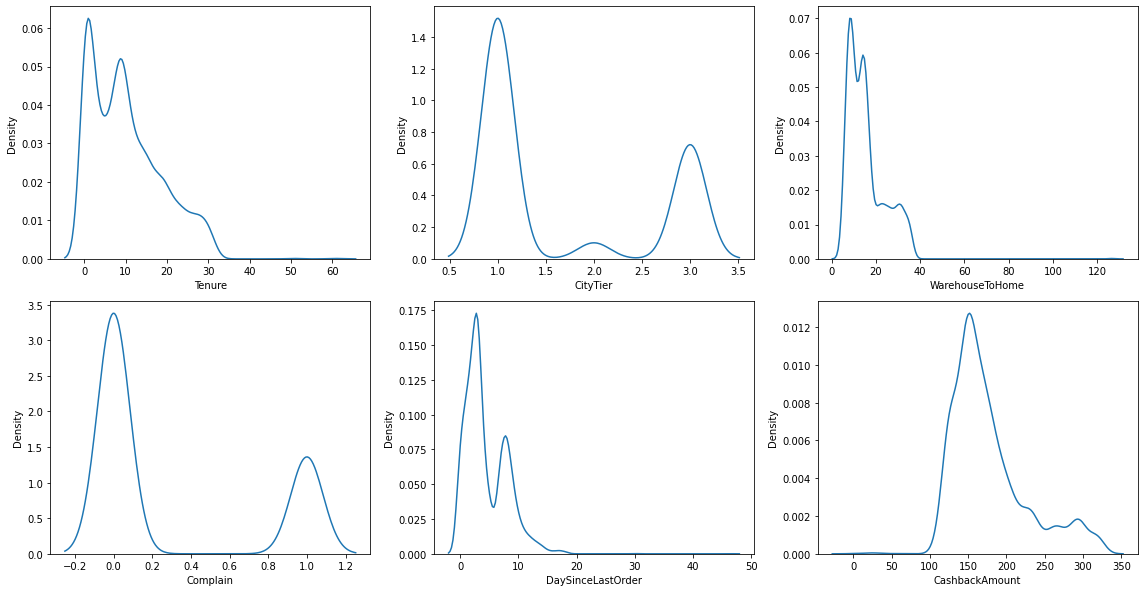

In [103]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train[num[i]])
    plt.tight_layout()

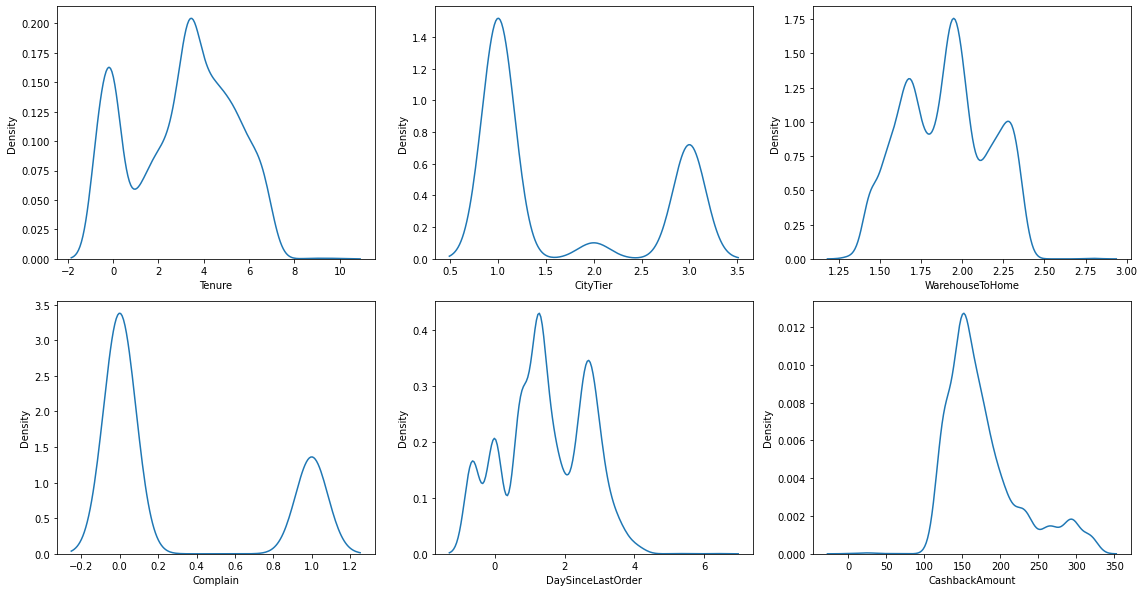

In [104]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train_transform[num[i]])
    plt.tight_layout()

In [105]:
X_train_log = X_train.copy()

In [106]:
for col in log_col:
    X_train_log.loc[X_train_log[col] == 0, col] =  X_train_log.loc[X_train_log[col] != 0][col].min()/2

In [107]:
for col in log_col:
    X_train_log[col] = np.log(X_train_log[col])

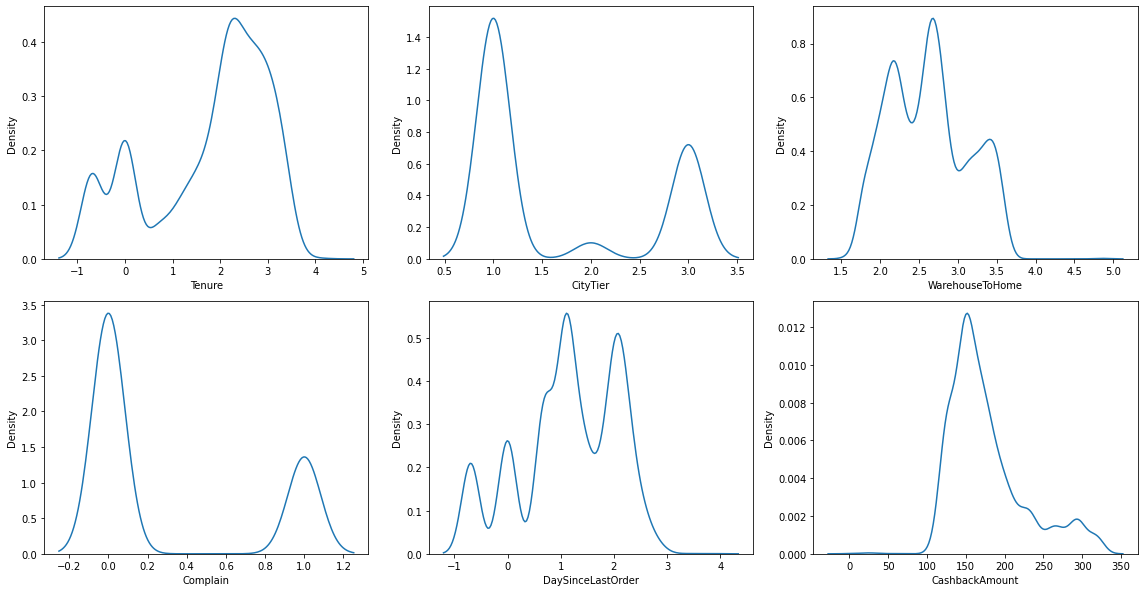

In [108]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train_log[num[i]])
    plt.tight_layout()

In [109]:
X_train_sqrt = X_train.copy()

# for col in log_col:
#     X_train_sqrt.loc[X_train_sqrt[col] == 0, col] =  X_train_sqrt.loc[X_train_log[col] != 0][col].min()/2

for col in log_col:
    X_train_sqrt[col] = np.sqrt(X_train_sqrt[col])
    


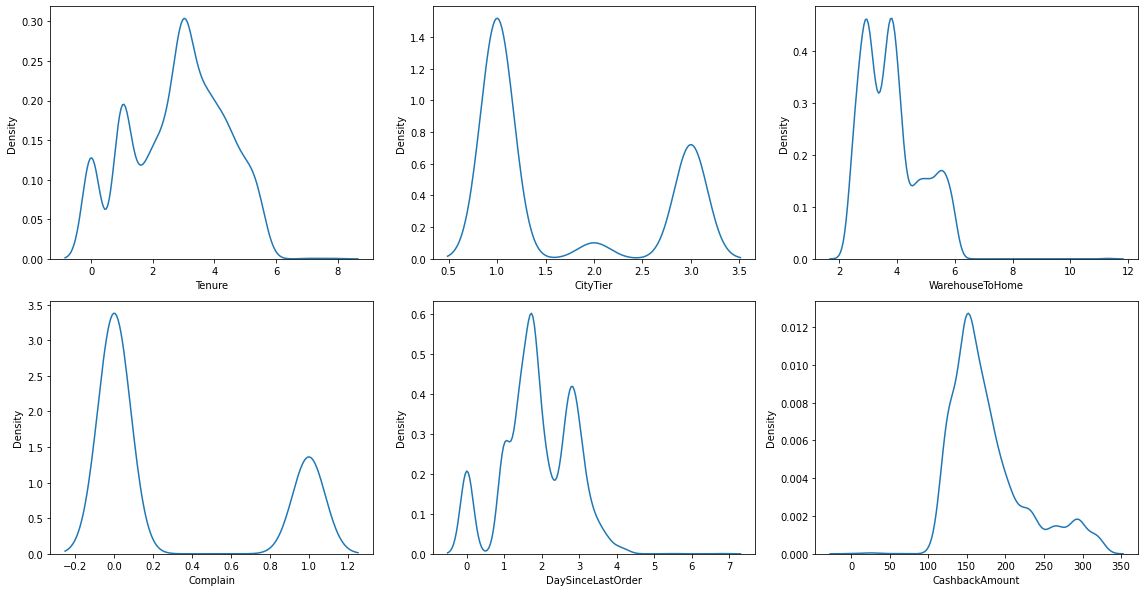

In [110]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train_sqrt[num[i]])
    plt.tight_layout()

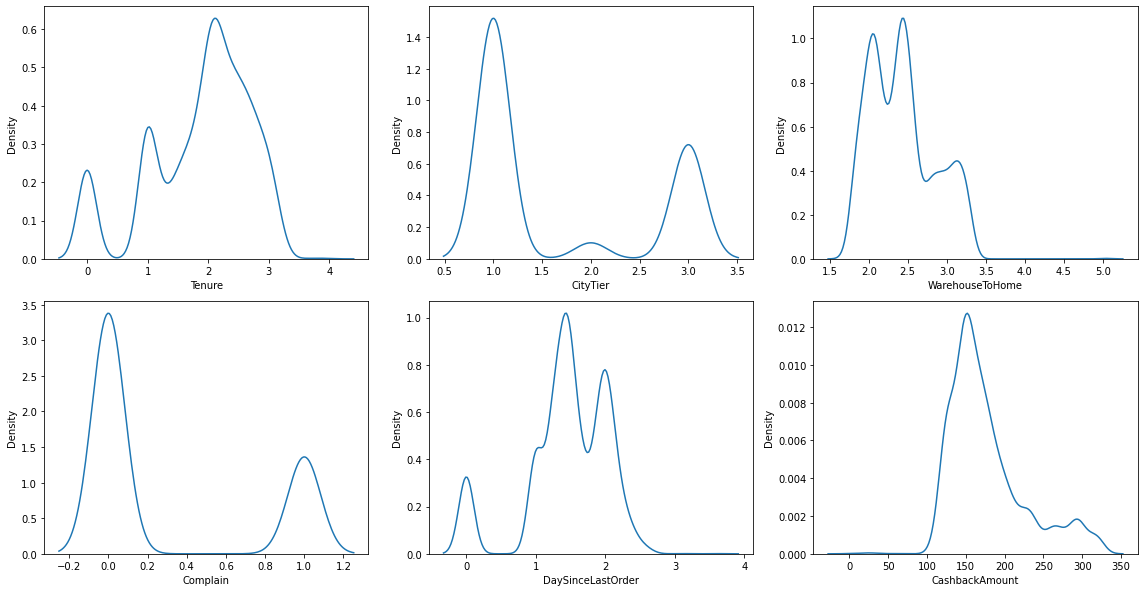

In [111]:
X_train_cbrt = X_train.copy()
for col in log_col:
    X_train_cbrt[col] = np.cbrt(X_train_cbrt[col])
    
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train_cbrt[num[i]])
    plt.tight_layout()

# conclusion for transformation

seperti yang dapat kita lihat, boxcox mentransformasi data kita lebih mendekati normal dibanding yang lainnya, karena itu kita akan memilih boxcox sebagai transformasi kita, sekarang kita akan memakai minmaxscaler(normalization) untuk scaling data kita agar memiliki range value yang sama sehingga dapat digunakan pada model yang menghitung jarak seperti logistic regression atau KNN

In [112]:
for col in log_col:
    X_test_transform.loc[X_test_transform[col] == 0, col] =  X_test_transform.loc[X_test_transform[col] != 0][col].min()/2
    
for col in log_col:
    X_test_transform[col] = stats.boxcox(X_test_transform[col])[0]

In [113]:
X_train_transform.describe()

,Tenure,CityTier,WarehouseToHome,Complain,DaySinceLastOrder,CashbackAmount
count,4504.000000,4504.000000,4504.000000,4504.000000,4504.000000,4504.000000
mean,3.028274,1.659192,1.899412,0.287078,1.451853,177.146754
std,2.216580,0.916920,0.256856,0.452449,1.178954,49.124316
min,-0.611405,1.000000,1.322362,0.000000,-0.638057,0.000000
25%,1.355468,1.000000,1.686059,0.000000,0.754766,145.700000
50%,3.390675,1.000000,1.926002,0.000000,1.258752,163.670000
75%,4.658314,3.000000,2.101079,1.000000,2.486233,195.820000
max,9.666503,3.000000,2.793800,1.000000,6.309468,324.990000


In [114]:
norm_col = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']

In [115]:
X_train_norm = X_train_transform.copy()
X_test_norm = X_test_transform.copy()

for i in norm_col:
    
    # fit on training data column
    scale = MinMaxScaler().fit(X_train_norm[[i]])
    
    # transform the training data column
    X_train_norm[i] = scale.transform(X_train_norm[[i]])
    
    # transform the testing data column
    X_test_norm[i] = scale.transform(X_test_norm[[i]])

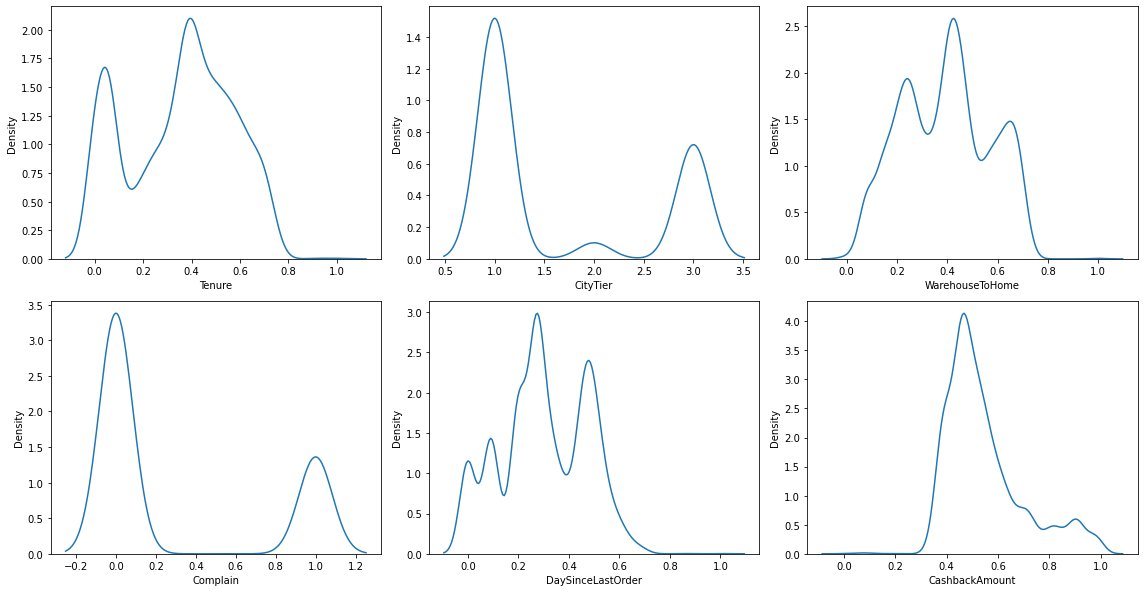

In [116]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_train_norm[num[i]])
    plt.tight_layout()

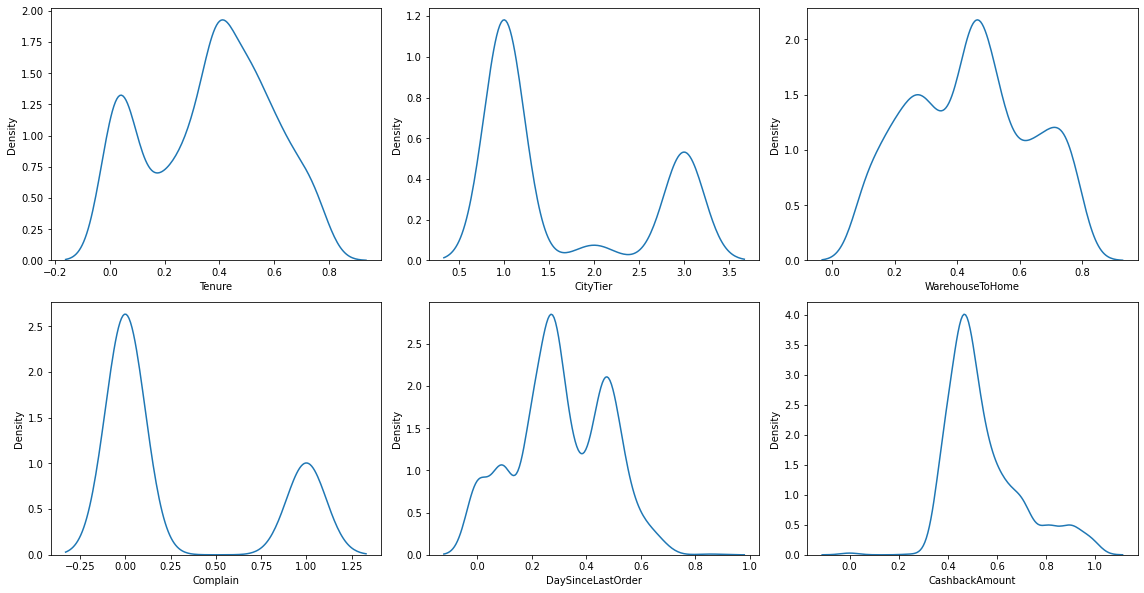

In [117]:
plt.figure(figsize = (16,12))
for i in range(len(num)):
    plt.subplot(3, round(len(num)/2), i+1)
    sns.kdeplot(x = X_test_norm[num[i]])
    plt.tight_layout()

In [118]:
df_train = X_train_norm.copy()

In [121]:
df_train['Churn'] = y_train

In [124]:
df_test = X_test_norm.copy()
df_test['Churn'] = y_test

In [125]:
df_train.to_csv('df_train.csv')
df_test.to_csv('df_test.csv')